In [ ]:
NAME : YUVARAJ JOSHITHA
REGISTER NUMBER: 212223240189
DEPARTMENT: AIML

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

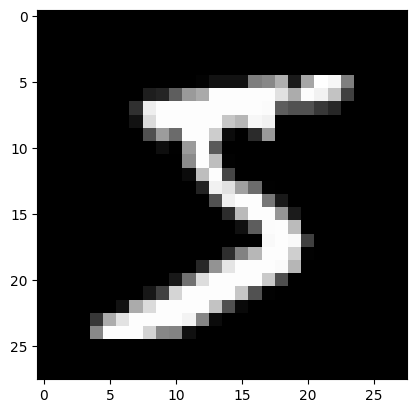

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

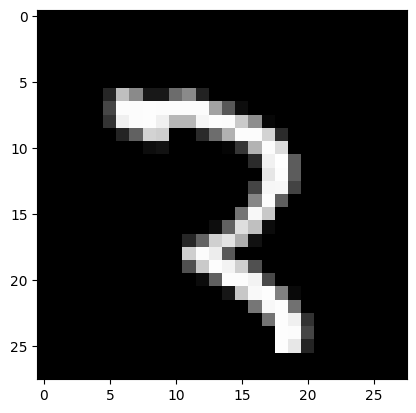

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')



In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 16)                86544     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 87034 (339.98 KB)
Trainable params: 87034 (339.98 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 8s 5ms/step - loss: 0.2905 - accuracy: 0.9154 - val_loss: 0.1129 - val_accuracy: 0.9670
Epoch 2/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0956 - accuracy: 0.9728 - val_loss: 0.0786 - val_accuracy: 0.9763
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0686 - accuracy: 0.9798 - val_loss: 0.0631 - val_accuracy: 0.9808
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0540 - accuracy: 0.9837 - val_loss: 0.0654 - val_accuracy: 0.9795
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0576 - val_accuracy: 0.9811


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.290523,0.915450,0.112860,0.9670
1,0.095650,0.972750,0.078555,0.9763
2,0.068601,0.979850,0.063141,0.9808
3,0.053953,0.983683,0.065425,0.9795
4,0.046548,0.985433,0.057595,0.9811


Y JOSHITHA
 212223240189


<Axes: >

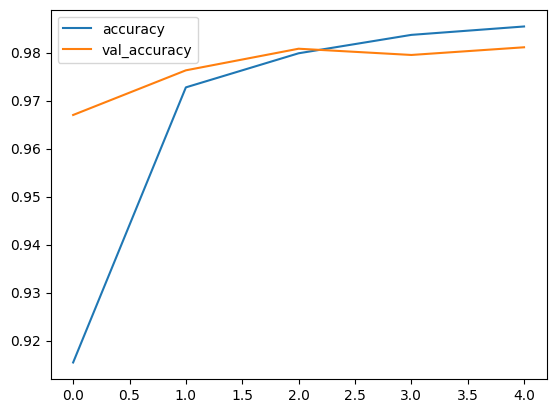

In [27]:
print("Y JOSHITHA\n 212223240189")
metrics[['accuracy','val_accuracy']].plot()

Y JOSHITHA
 212223240189


<Axes: >

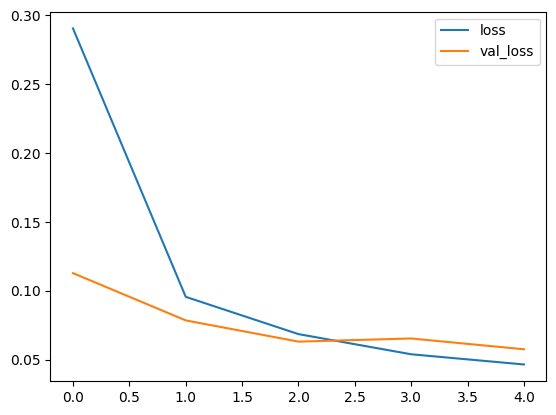

In [28]:
print("Y JOSHITHA\n 212223240189")
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 1s 3ms/step


In [30]:
print("Y JOSHITHA\n 212223240189")
print(confusion_matrix(y_test,x_test_predictions))

Y JOSHITHA
 212223240189
[[ 970    0    1    0    0    0    1    1    3    4]
 [   0 1127    1    0    1    0    1    1    3    1]
 [   4    6  990    2    2    0    1   12   14    1]
 [   0    0    2  996    0    2    0    3    5    2]
 [   0    1    0    0  955    0    2    0    3   21]
 [   3    0    0    9    0  868    3    0    5    4]
 [   7    3    0    0    2    2  938    0    6    0]
 [   0    1    3    1    0    0    0 1015    2    6]
 [   3    0    2    0    0    1    1    4  957    6]
 [   2    0    0    3    2    0    0    4    3  995]]


In [31]:
print("Y JOSHITHA\n 212223240189")
print(classification_report(y_test,x_test_predictions))

Y JOSHITHA
 212223240189
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [34]:
img = image.load_img('/content/image four.jpg')



In [35]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [36]:
img = image.load_img('/content/image four.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [37]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 63ms/step


In [38]:
print(x_single_prediction)

[8]


Y JOSHITHA
 212223240189


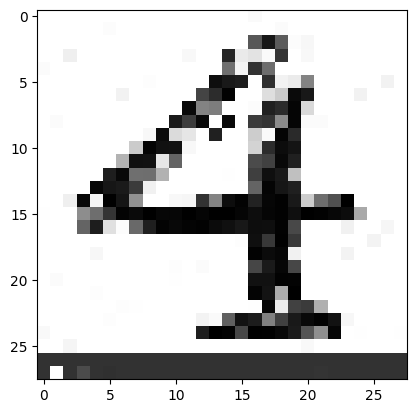

In [39]:
print("Y JOSHITHA\n 212223240189")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
print(x_single_prediction)

[4]
